# Artem Moskalev. Random Signals, Discrete KLT transform (PCA) and Wiener Filtering

In [1]:
# import the necessary modules
%matplotlib inline

import scipy.misc
import scipy.io
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_images(input, input_title, output, output_title):
    fig, (im_input, im_output) = plt.subplots(1, 2, figsize=(15, 35))
    im_input.imshow(input, cmap='gray')
    im_input.set_title(input_title)
    im_input.set_axis_off()
    im_output.imshow(output, cmap='gray')
    im_output.set_title(output_title)
    im_output.set_axis_off()
    fig.show()

# Random signals

### Exercise 1

Consider the random process:
$$x(n) = Acos(n\omega + \phi) + w(n)$$

where $ w(n) $ is zero mean white Gaussian noise with variance $ \sigma _w^2 $ . 
For each of the following cases, find the autocorrelation sequence and if the process is WSS, find the power spectrum.

a) $A$ is Gaussian random variable with zero mean and variance $ \sigma _A^2 $ and both $\omega$ and $\phi$ are constants.

b) $\phi$ is uniformly distibuted over the interval $[-\pi, \pi]$ and both $A$ and $\omega$ are constants.

c) $\omega$ is a random variable that is uniformly distributed over the interval $[\omega - \Delta, \omega + \Delta]$ and both $A$ and $\phi$ are constants.

#### Solution:

 - Papaer based

### Exercise 2

Suppose we are given a linear shift-invariant system having a system function:

$$ H(z) = \frac{1-\frac{1}{2}z^{-1}}{1-\frac{1}{3}z^{-1}}$$

that is excited by zero mean exponentially correlated noise $x(n)$ with an autocorrelation sequence:

$$r_x(k) = \left( \frac{1}{2} \right)^{\lvert k \rvert}$$

Let $y(n)$ be the output process, $y(n) = x(n)* h(n)$

a) Find the power spectrum, $P_y(z)$, of $y(n)$.

b) Find the autocorrelation sequence, $r_y(k)$, of $y(n)$.

c) Find the cross-correlation, $r_{xy}(k)$, between $x(n)$ and $y(n)$.

#### Solution:



a) $P_y(e^{j\Omega}) \triangleq |H(e^{j\Omega})|^2P_x(e^{j\Omega}) = |H(e^{j\Omega})|^2 \Im (r_x(k))$


$P_x(z) = \mathcal{Z}([\frac 1 2 ]^{|k|}) = \frac {\frac 3 4} {(1- \frac 1 2 z)(1- \frac 1 2 z^{-1})}$


$P_y(z)=|H(z)|^2 P_x(z) = \frac {1 - \frac 1 2 z} {1 - \frac 1 3 z} \frac {1 - \frac 1 2 z^{-1}} {1 - \frac 1 3 z^{-1}} \frac {\frac 3 4} {(1- \frac 1 2 z)(1- \frac 1 2 z^{-1})} = \frac 3 {4(1- \frac 1 3 z)(1- \frac 1 3 z^{-1})}$


b) $r_y(k) = \mathcal{Z}^{-1}(P_y(z)) = \frac {21} {28} (\frac 1 3)^{|k|}$ (thx matlab)

c) $r_{xy} = h(k)*r_k(x) = \mathcal{Z}^{-1} \mathcal{Z}(h(k)*r_x(k)) = \mathcal{Z}^{-1} (h(z)r_x(z)) = \frac{(1-\frac{1}{2}z^{-1})}{(1-\frac{1}{3}z^{-1})} \frac 3 {4(1- \frac 1 3 z)(1- \frac 1 3 z^{-1})} = \frac 3 {4(1- \frac 1 2 z)(1- \frac 1 3 z^{-1})}$


### Exercise 3

In some applications, the data collection process may be flawed so that there are either missing data values or outliers that should be discarded. Suppose that we are given $N$ samples of a WSS process $x(n)$ with one value, $x(n_0)$, missing. Let $\mathbf{x}$ be the vector containing the given sample values,

$$\mathbf{x} = [x(0), x(1), ..., x(n_0 - 1), x(n_0 + 1), ..., x(N)]^T$$

a) Let $\mathbf{R}_x$ be the autocorrelation matrix for the vector $\mathbf{x}$,

$$\mathbf{R}_x = E\{xx^H\}$$

Which of the followint statements are true:

  1. $\mathbf{R}_x$ is Toeplitz.
  2. $\mathbf{R}_x$ is Hermitian.
  3. $\mathbf{R}_x$ is positive semidefinite.

b) Given the autocorrelation matrix of $\mathbf{x}$, is it possible to find the autocorrelation matrix for the vector:
$$\mathbf{x} = [x(0), x(1), ..., x(N)]^T$$
that does not have $x(n_0)$ missing? If so, how would you find it? If not, explain why not.

#### Solution:

 - Paper based

### Linear Predictive Coding (LPC)

Detailed explanation of the task please read in the **LPC/hometask.pdf** file.

/home/art_mos/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


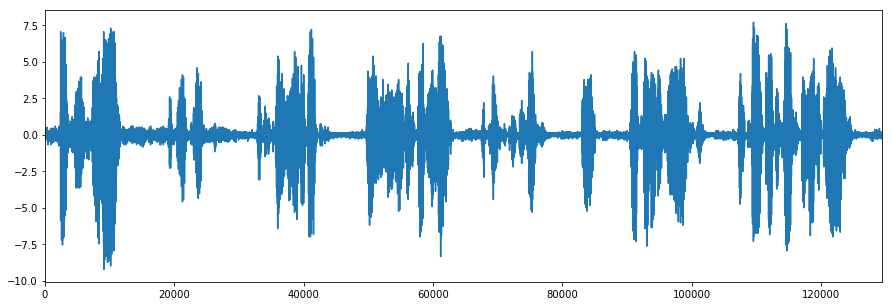

In [3]:
from scipy.io import wavfile
# read wav-file

samp_freq, snd = wavfile.read('LPC/howsoon.wav')

# data whitening

snd = (snd - np.mean(snd)) / np.std(snd)

# plot the audio

plt.figure(figsize = (15,5))
plt.xlim(0, 129423)
plt.plot(snd);

In [4]:
from IPython.display import Audio

# play the audio

Audio(snd, rate = samp_freq)

In [5]:
# input your code here
interval = [14000, 32000]
Audio(snd[interval[0]:interval[1]], rate = samp_freq)

###### Q1:

In [6]:
sig = np.copy(snd[interval[0]:interval[1]])

In [7]:
def autocorrelation(signal):
    
    autocorr_seq= np.correlate(signal, signal, mode='full')
    autocorr_seq = autocorr_seq[:np.argmax(autocorr_seq)+1]
    return np.flip(autocorr_seq,0)

In [8]:
from scipy.linalg import toeplitz

def autocorrelation_toeplitz(signal, p):
    
    autocorr_seq1 = np.array(list(signal) + list(np.zeros(signal.shape[0]-1)))[:p]
    autocorr_seq2 = np.array([signal[0]] + list(np.zeros(signal.shape[0]-1)) + list(signal)[1:])[:p]
    T = toeplitz(autocorr_seq2, autocorr_seq1)[:signal.shape[0],:]
    corr = T @ np.array(autocorr_seq1)
    return corr

In [9]:
autocorrelation_toeplitz(np.array([1,2,3,4,5]), 100) == autocorrelation(np.array([1,2,3,4,5]))

array([ True,  True,  True,  True,  True], dtype=bool)

In [10]:
def estimate_coefficient(signal, p=100):
    
    autocorr_M = autocorrelation(signal)[:p+1]
    autocorr_mat = toeplitz(autocorr_M)
    a_opt = np.linalg.pinv(autocorr_mat[:-1,:-1]) @ (-1*autocorr_mat[0][1:])
    
    return a_opt

###### Q3:

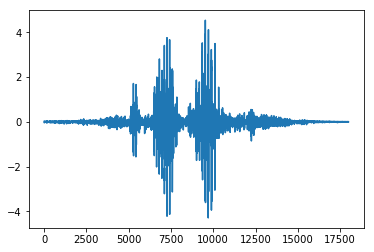

In [11]:
#hamming = np.multiply(sig, np.hamming(sig.shape[0]))
hamming = sig*np.hamming(sig.shape[0])
plt.plot(hamming);

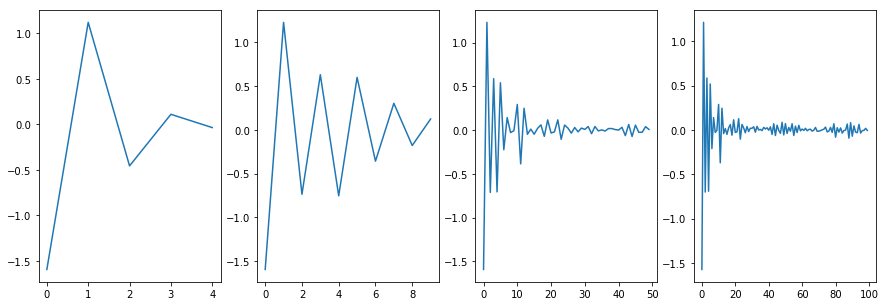

In [12]:
A5=estimate_coefficient(hamming, p = 5)
A10=estimate_coefficient(hamming, p = 10)
A50=estimate_coefficient(hamming, p = 50)
A100=estimate_coefficient(hamming, p = 100)

fig, axh = plt.subplots(1,4, figsize=(15,5))
axh[0].plot(A5)
axh[1].plot(A10)
axh[2].plot(A50)
axh[3].plot(A100);

So, as we see, they are the same, so may way works correct. Cheers!

###### Q4:

In [13]:
from scipy.signal import lfilter

restored_lpc5 = lfilter(A5, [1], sig)
restored_lpc10 = lfilter(A10, [1], sig)
restored_lpc50 = lfilter(A50, [1], sig)
restored_lpc100= lfilter(A100, [1], sig)

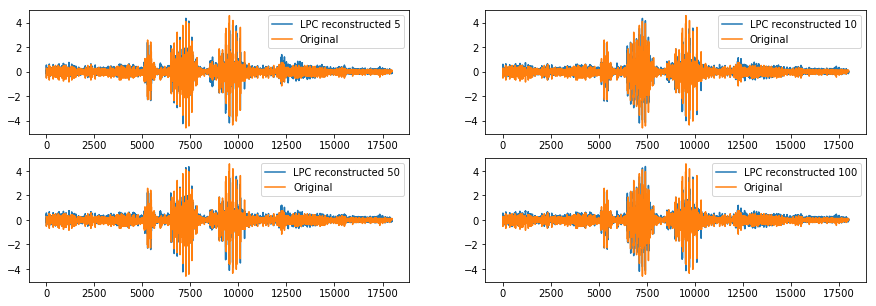

In [14]:
fig, axr = plt.subplots(2,2, figsize=(15,5))

axr[0,0].plot(restored_lpc5, label='LPC reconstructed 5')
axr[0,0].plot(sig, label='Original')
axr[0,0].legend()
axr[0,1].plot(restored_lpc10, label='LPC reconstructed 10')
axr[0,1].plot(sig, label='Original')
axr[0,1].legend()
axr[1,0].plot(restored_lpc50, label='LPC reconstructed 50')
axr[1,0].plot(sig, label='Original')
axr[1,0].legend()
axr[1,1].plot(restored_lpc100, label='LPC reconstructed 100')
axr[1,1].plot(sig, label='Original')
axr[1,1].legend();

 - Forward error:

In [15]:
errors = [sig-each_lpc for each_lpc in [restored_lpc5,restored_lpc10,restored_lpc50,restored_lpc100]]

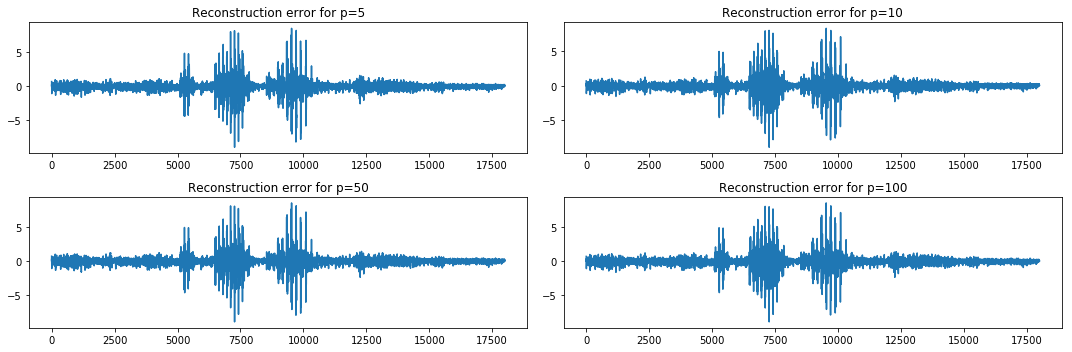

In [16]:
fig, axr = plt.subplots(2,2, figsize=(15,5))

axr[0,0].plot(errors[0])
axr[0,0].set_title('Reconstruction error for p=5')
axr[0,1].plot(errors[1])
axr[0,1].set_title('Reconstruction error for p=10')
axr[1,0].plot(errors[2])
axr[1,0].set_title('Reconstruction error for p=50')
axr[1,1].plot(errors[3])
axr[1,1].set_title('Reconstruction error for p=100')
plt.tight_layout();

 - Squared error:

In [17]:
se_errors = [p**2 for p in errors]

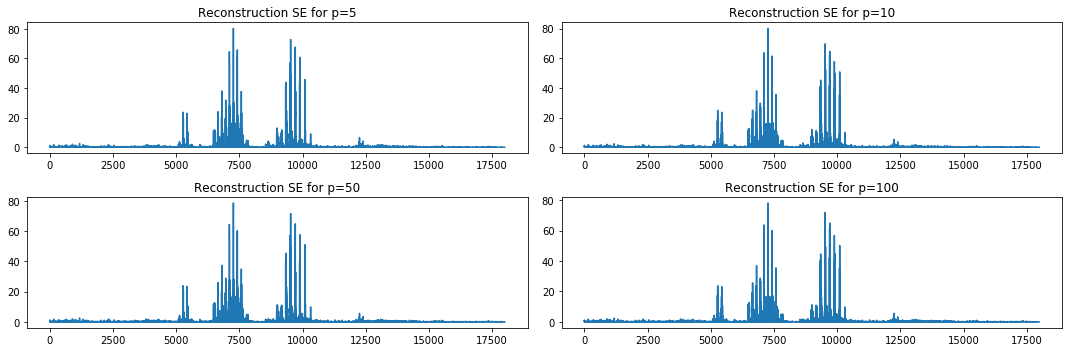

In [18]:
fig, axmse = plt.subplots(2,2, figsize=(15,5))

axmse[0,0].plot(se_errors[0])
axmse[0,0].set_title('Reconstruction SE for p=5')
axmse[0,1].plot(se_errors[1])
axmse[0,1].set_title('Reconstruction SE for p=10')
axmse[1,0].plot(se_errors[2])
axmse[1,0].set_title('Reconstruction SE for p=50')
axmse[1,1].plot(se_errors[3])
axmse[1,1].set_title('Reconstruction SE for p=100')
plt.tight_layout();

In [19]:
mse_errors = [p.mean() for p in se_errors]
print('MSE for LPC p = 5:', mse_errors[0])
print('MSE for LPC p = 10:', mse_errors[1])
print('MSE for LPC p = 50:', mse_errors[2])
print('MSE for LPC p = 100:', mse_errors[3])

MSE for LPC p = 5: 0.595182943722
MSE for LPC p = 10: 0.596102718745
MSE for LPC p = 50: 0.599925411167
MSE for LPC p = 100: 0.601324681883


###### Q5:

In [20]:
errors_stds = [np.std(each_error) for each_error in errors]
se_errors_stds = [np.std(each_error) for each_error in se_errors]

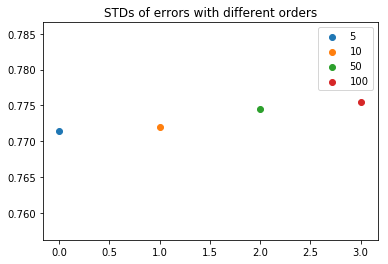

In [21]:
plt.scatter(0,errors_stds[0], label='5')
plt.scatter(1,errors_stds[1], label='10')
plt.scatter(2,errors_stds[2], label='50')
plt.scatter(3,errors_stds[3], label='100')
plt.legend()
plt.title('STDs of errors with different orders');

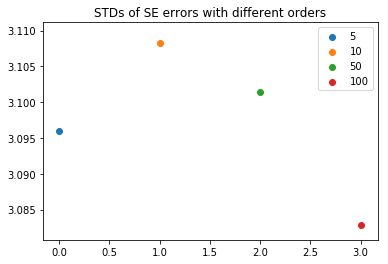

In [22]:
plt.scatter(0,se_errors_stds[0], label='5')
plt.scatter(1,se_errors_stds[1], label='10')
plt.scatter(2,se_errors_stds[2], label='50')
plt.scatter(3,se_errors_stds[3], label='100')
plt.legend()
plt.title('STDs of SE errors with different orders');

###### Q6:

In [23]:
errors_spectrum = [np.abs(np.fft.fft(ee)) for ee in errors] #compute spectrum

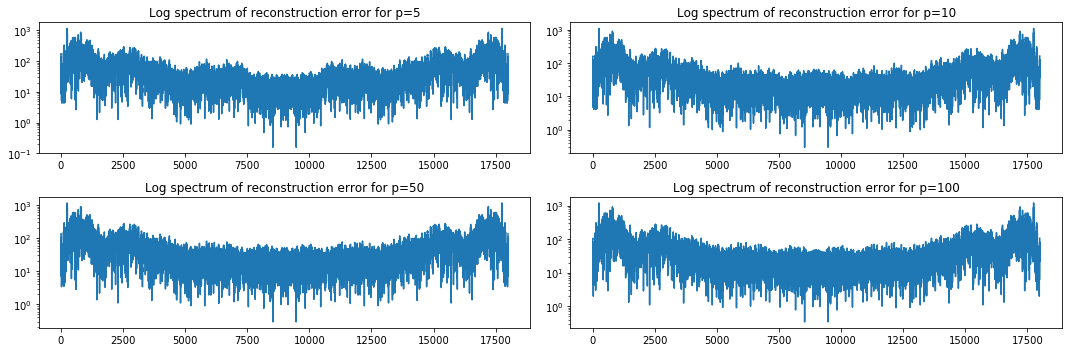

In [24]:
fig, axs = plt.subplots(2,2, figsize=(15,5))

axs[0,0].plot(errors_spectrum[0])
axs[0,0].set_title('Log spectrum of reconstruction error for p=5')
axs[0,1].plot(errors_spectrum[1])
axs[0,1].set_title('Log spectrum of reconstruction error for p=10')
axs[1,0].plot(errors_spectrum[2])
axs[1,0].set_title('Log spectrum of reconstruction error for p=50')
axs[1,1].plot(errors_spectrum[3])
axs[1,1].set_title('Log spectrum of reconstruction error for p=100')
axs[0,0].semilogy()
axs[0,1].semilogy()
axs[1,0].semilogy()
axs[1,1].semilogy()
plt.tight_layout();

In [25]:
se_errors_spectrum = [np.abs(np.fft.fft(ee)) for ee in se_errors] #compute spectrum

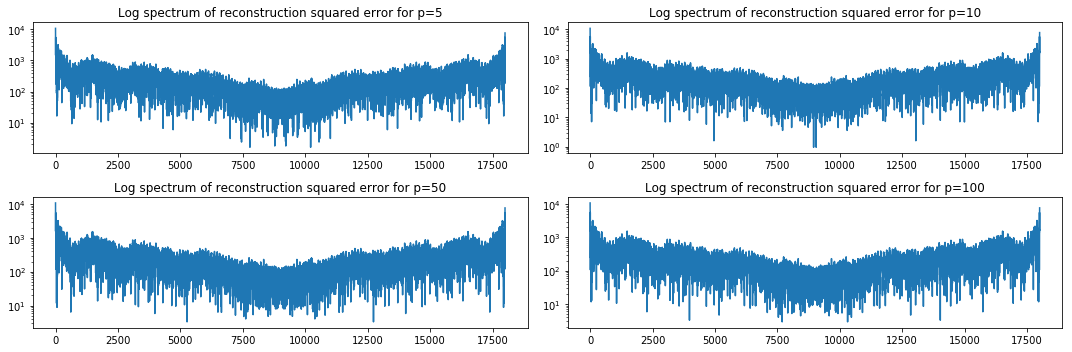

In [26]:
fig, axs = plt.subplots(2,2, figsize=(15,5))

axs[0,0].plot(se_errors_spectrum[0])
axs[0,0].set_title('Log spectrum of reconstruction squared error for p=5')
axs[0,1].plot(se_errors_spectrum[1])
axs[0,1].set_title('Log spectrum of reconstruction squared error for p=10')
axs[1,0].plot(se_errors_spectrum[2])
axs[1,0].set_title('Log spectrum of reconstruction squared error for p=50')
axs[1,1].plot(se_errors_spectrum[3])
axs[1,1].set_title('Log spectrum of reconstruction squared error for p=100')
axs[0,0].semilogy()
axs[0,1].semilogy()
axs[1,0].semilogy()
axs[1,1].semilogy()
plt.tight_layout();

# Discrete Karhunen-Loeve Transform (PCA)

We see that as order increases, squared error decreases, so our LPC reconstruction is more accurate. On the spectrum of squared error of LPC order 10 reconstruction (the one with the highest error) we see the spectrum area (the medium of the plot), where model does not perform so well, which is also can be seen on just error plots.

The problem with the image representation we are given is its high dimensionality. Two-dimensional $ m×n $ grayscale images span a $ mn $ dimensional vector space, so an image with $ 192×168 $  pixels lies in a $ 32,256 $ dimensional image space.
The question is, are all dimensions really useful for us?
**Eigenfaces**  are based on the dimensional reduction approach of **Principal Component Analysis (PCA)**. The basic idea is to treat each image as a vector in a high dimensional space. Then,  PCA  is applied to the set of images to produce a new reduced subspace that captures most of the variability between the input images. The  **Pricipal Component Vectors** (eigenvectors of the sample covariance matrix) are called the  **Eigenfaces**. Every input image can be represented as a linear combination of these eigenfaces by projecting the image onto the new eigenfaces space. 

Implement the **PCA** algorithm and reduce the image dimensionality from $ 192 \times 168 $ to $ 128 $, $ 64 $, $ 32 $ and $ 16 $, and plot the results.

In [27]:
def image_grid(D, H, W, cols=10, scale=1):
    """ display a grid of images
        H, W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen 
        
        Credit: Ryan Quan
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n + 0.0) / cols))
    fig = plt.figure(1, figsize = [scale * 20.0 / H * W, scale * 20.0 / cols * rows], dpi=300)
    for i in range(n):
        plt.subplot(rows, cols, i + 1)
        fig = plt.imshow(np.reshape(D[i,:], [H, W]), cmap = plt.get_cmap('gray'))
        plt.axis('off')

In [28]:
# load the data

data = scipy.io.loadmat('faces.mat')

x = data['faces']
image_h = np.asscalar(data['H'])
image_w = np.asscalar(data['W'])

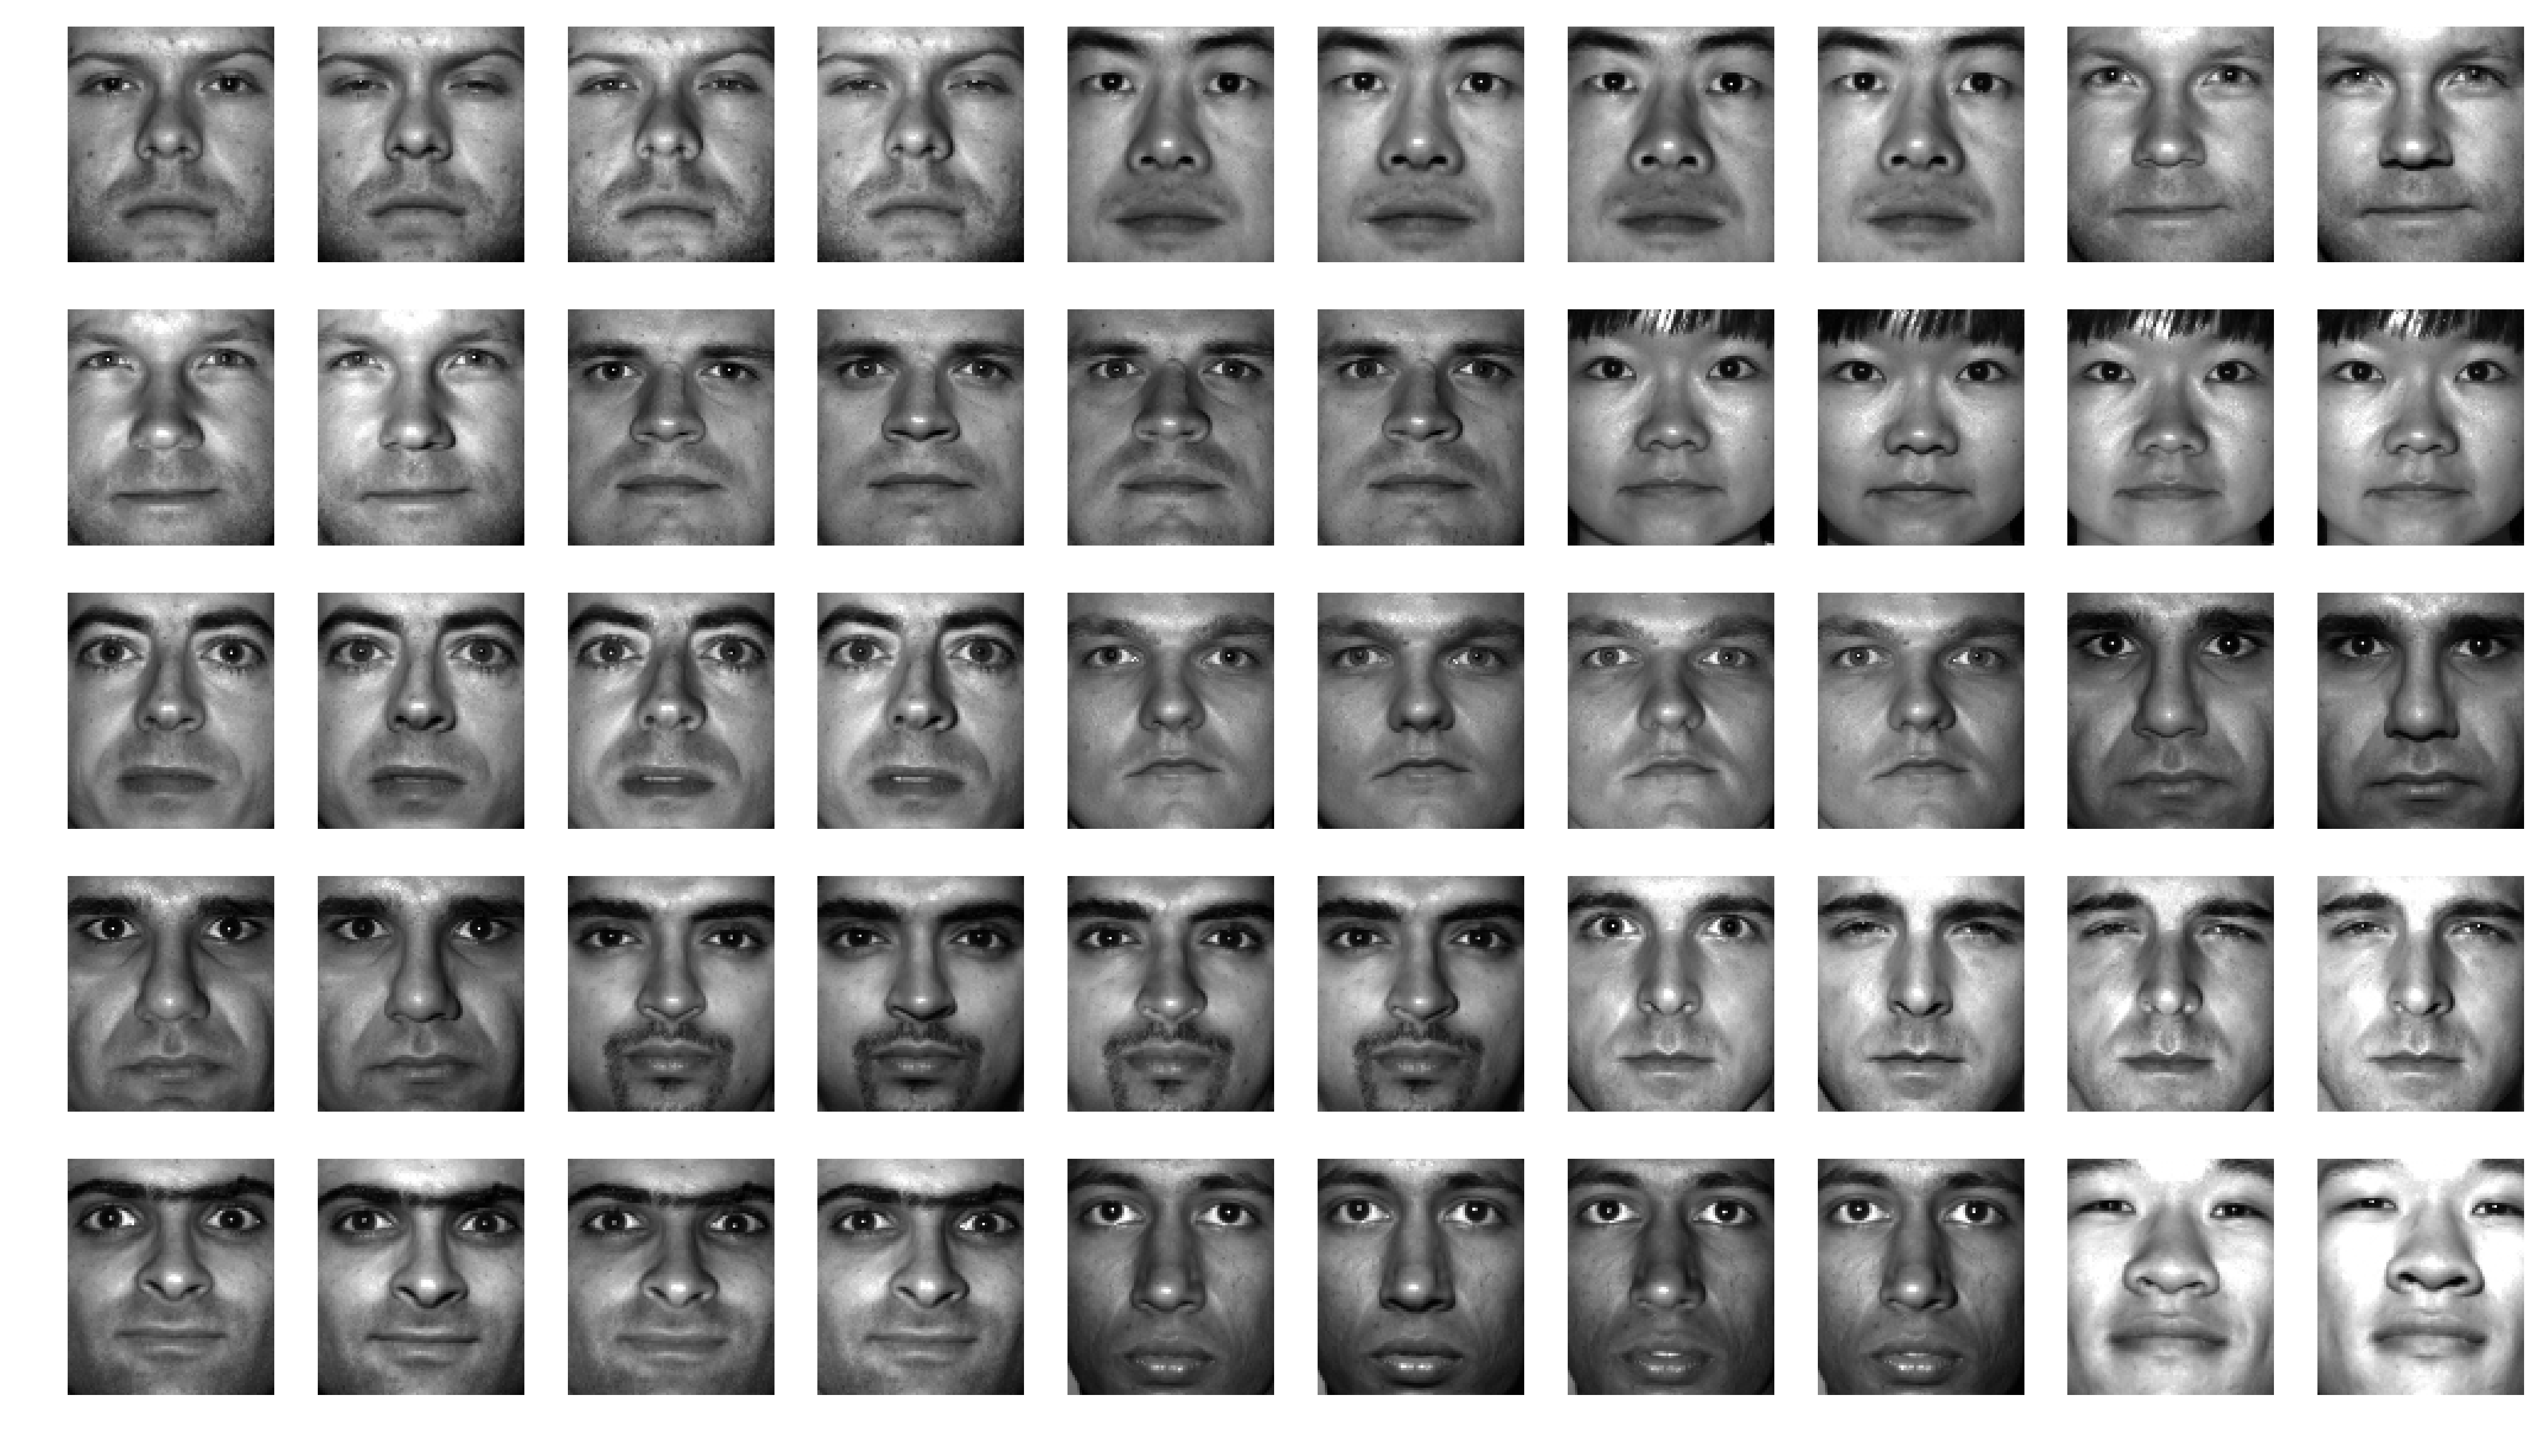

In [29]:
# show the gallery

image_grid(x[:50], image_h, image_w)

In [30]:
from scipy.sparse.linalg import svds

def kltpca(data, n_components=4): 
    #I suggest perform classical PCA through SVD (spectral dectomposition of data covariance matrix is 
    #just SVD of data matrix), so we can plug eigenvectors out of U matrix
    
    U, s, V = svds(np.copy(data).T, k=n_components)
    #U = (8064, 128)
    #data = (152, 8064) 
    transformed = np.zeros((data.shape[0],n_components))
    for i,each_observation in enumerate(data):
        for j, each_eigenface in enumerate(U.T):
            projected = each_observation@each_eigenface
            transformed[i,j] = projected
    print(transformed.shape)
     # transformed = (152, 128) 
    restoration = transformed@U.T
    return restoration

(152, 128)


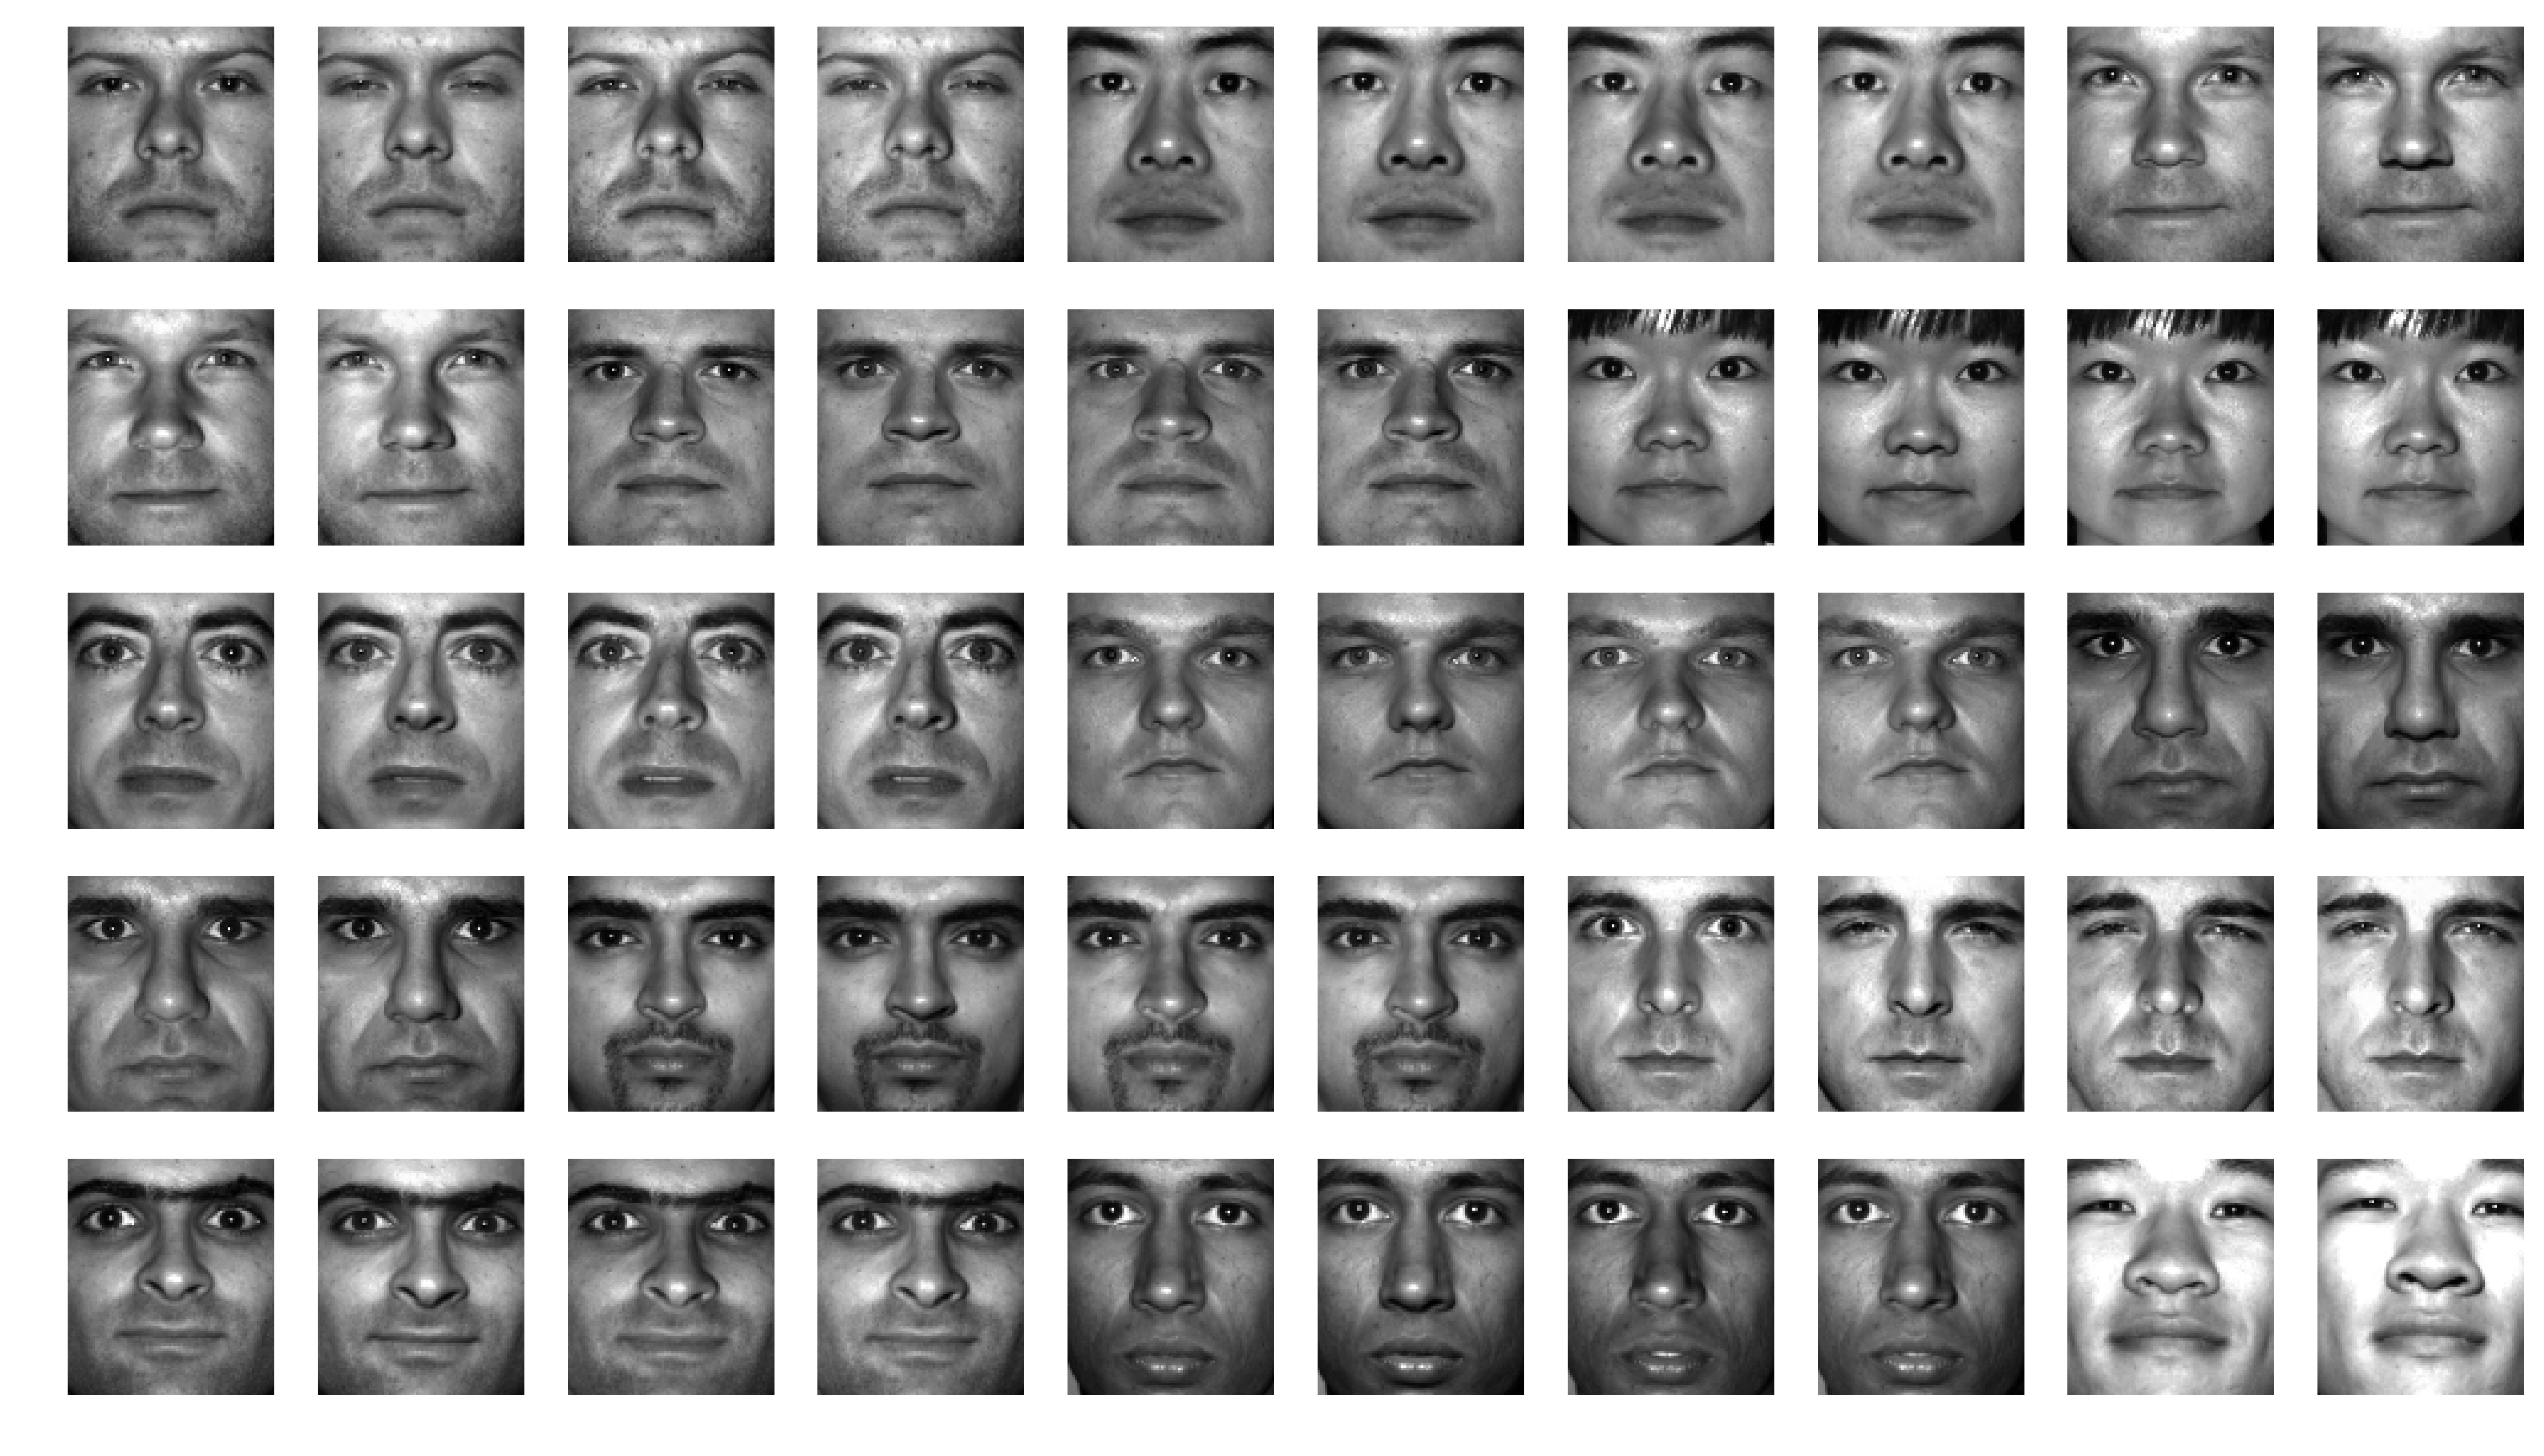

In [31]:
transformed_128 = kltpca(x, n_components=128)
image_grid(transformed_128[:50], image_h, image_w)

(152, 64)


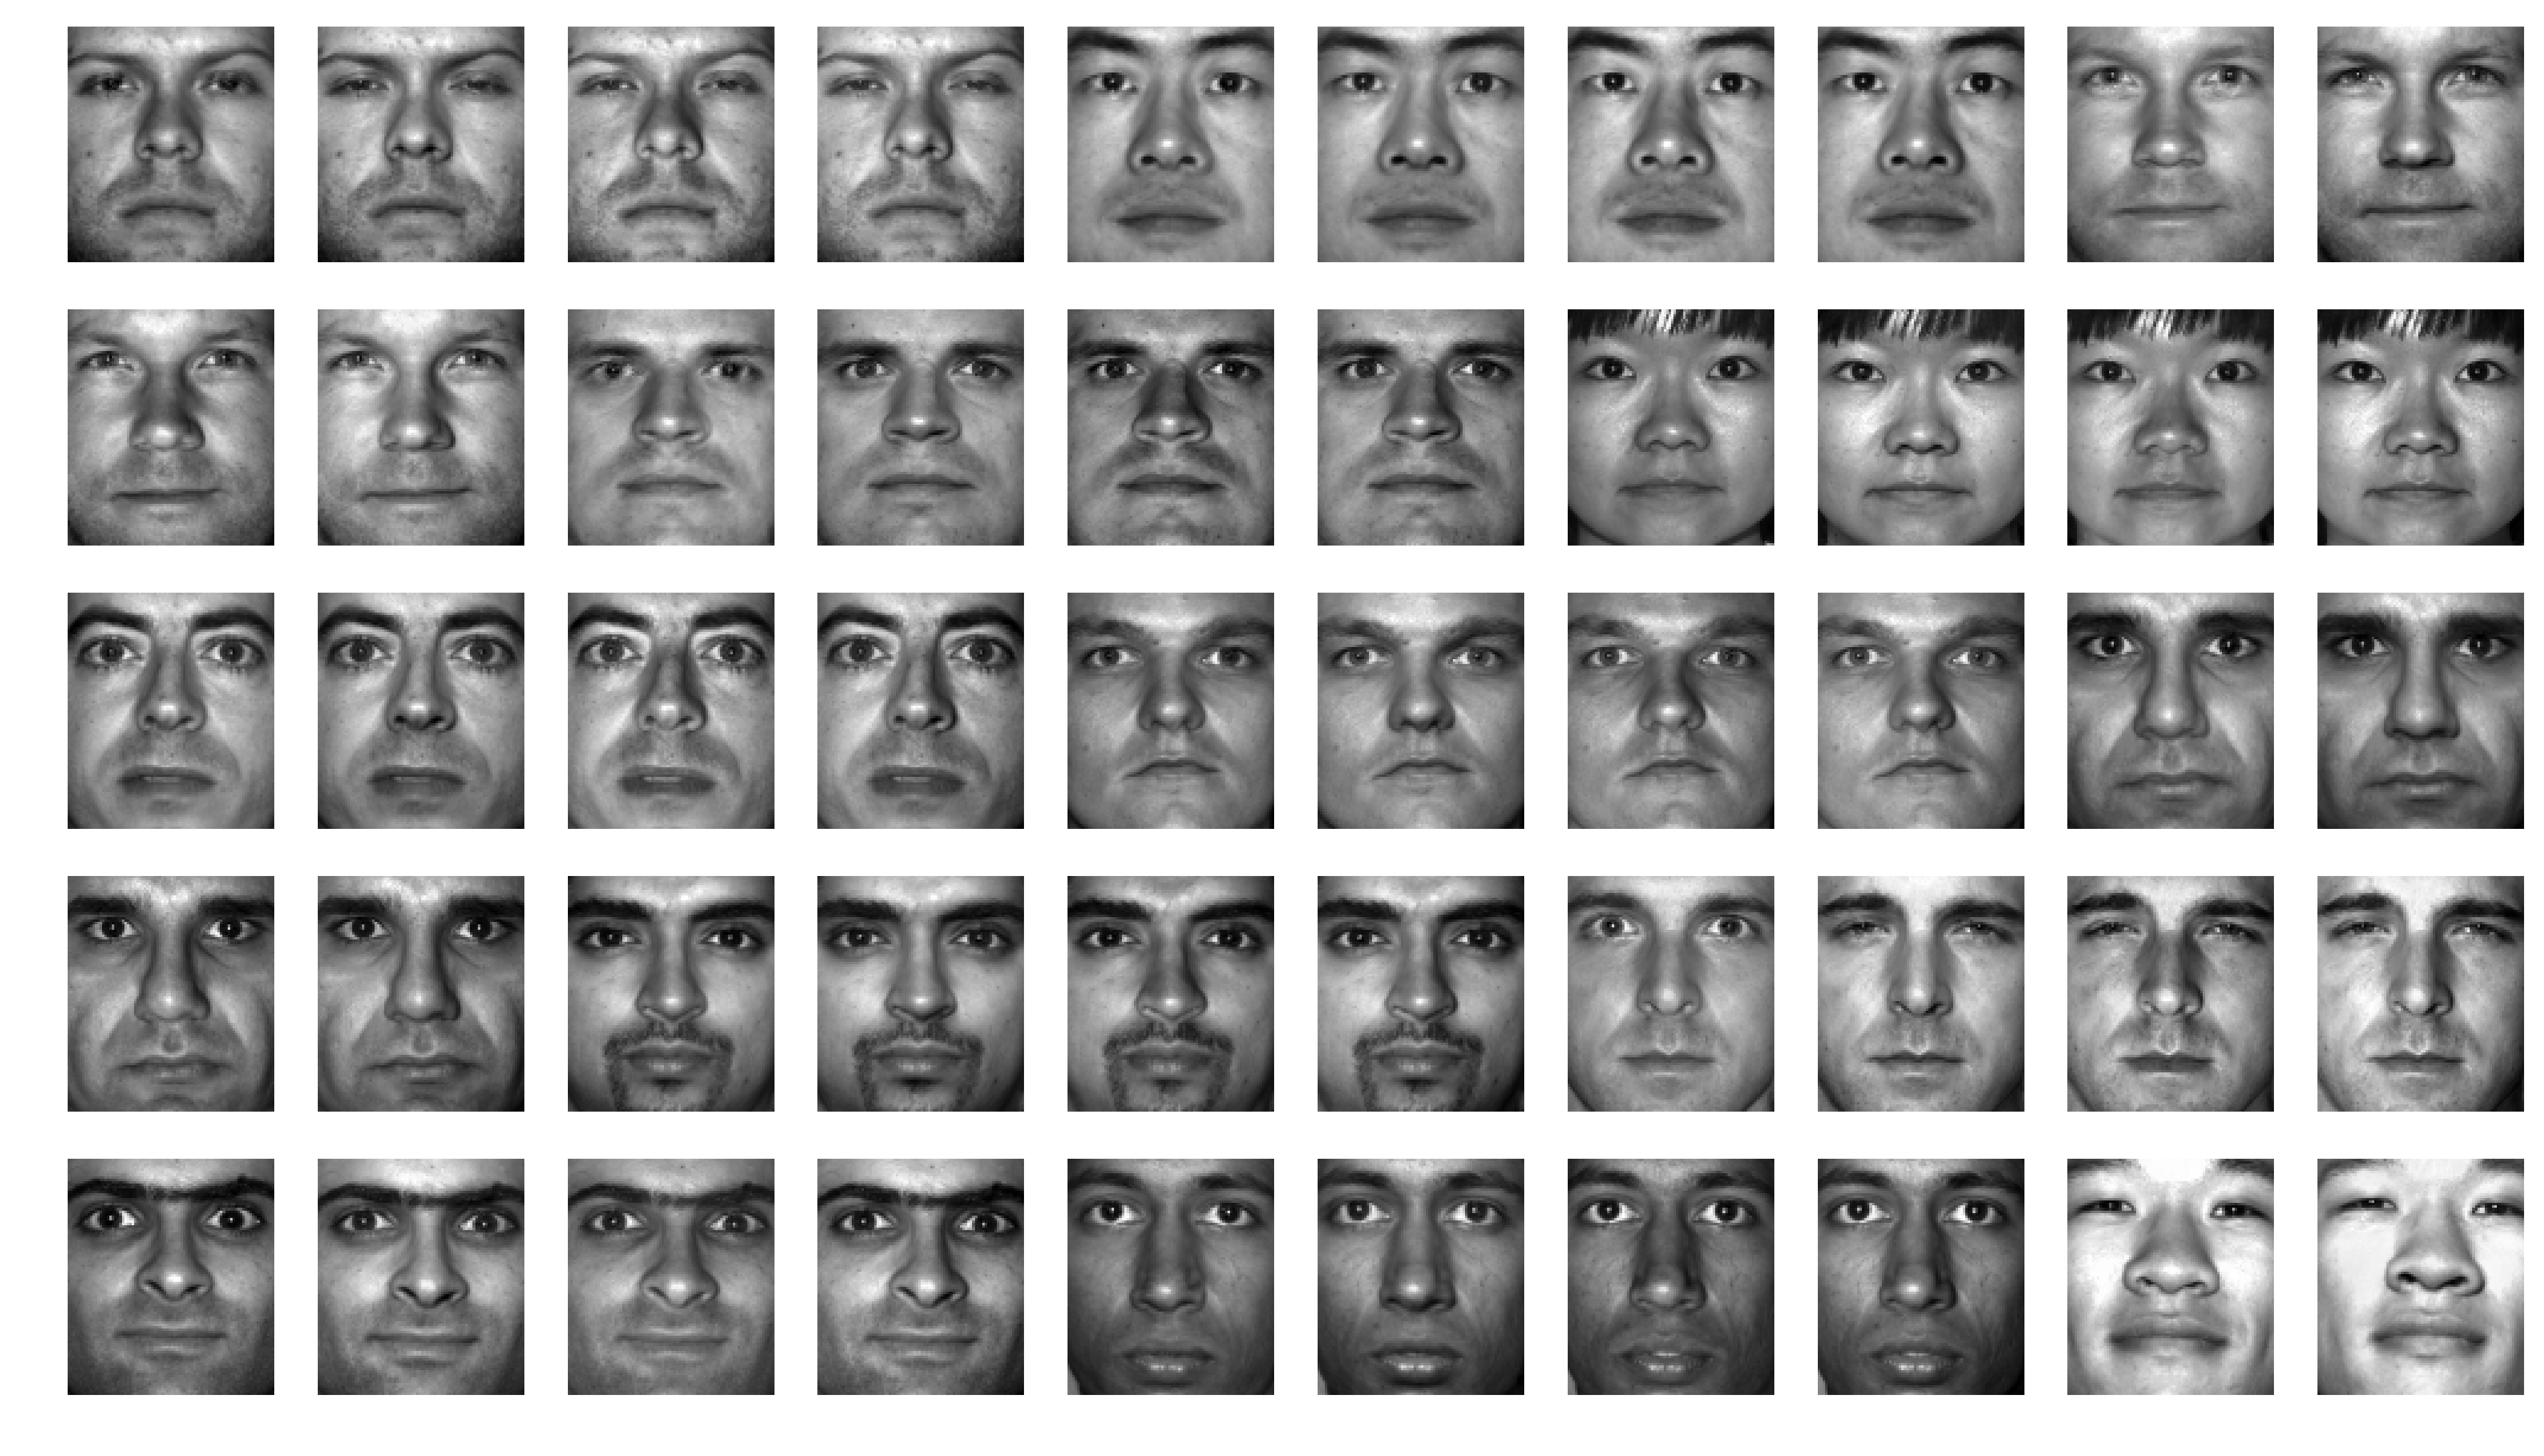

In [32]:
transformed_64 = kltpca(x, n_components=64)
image_grid(transformed_64[:50], image_h, image_w)

(152, 32)


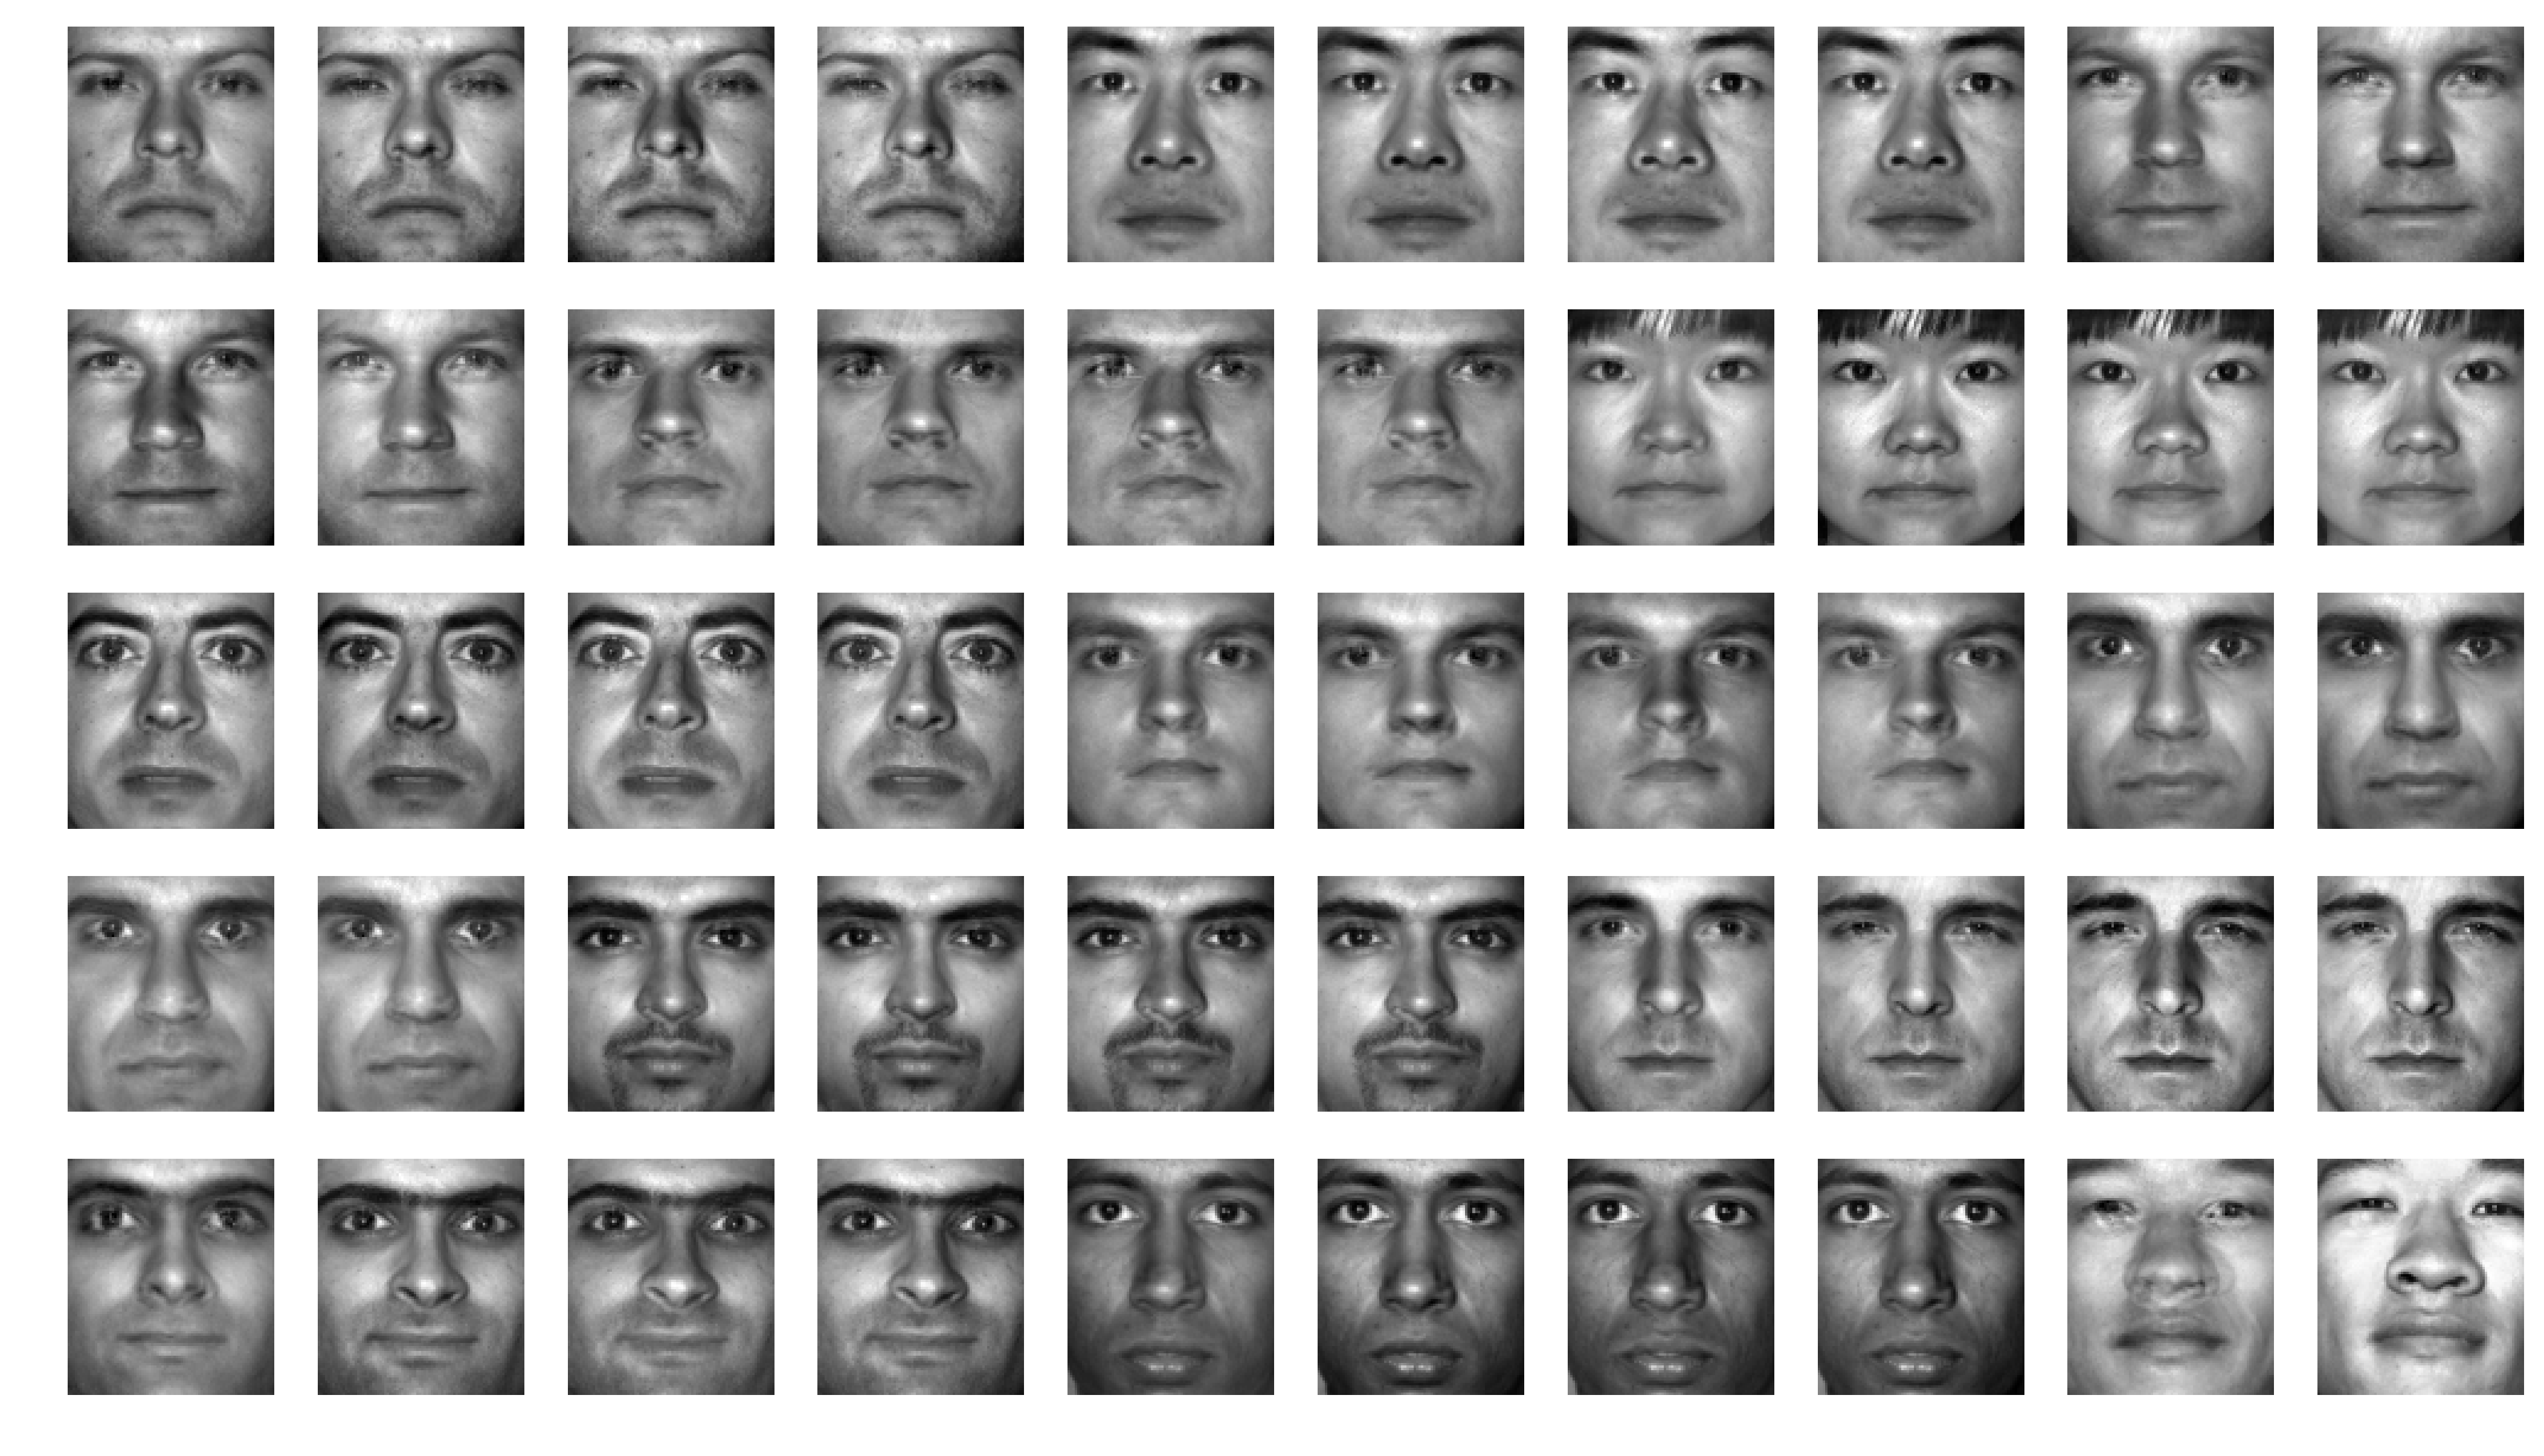

In [33]:
transformed_32 = kltpca(x, n_components=32)
image_grid(transformed_32[:50], image_h, image_w)

(152, 16)


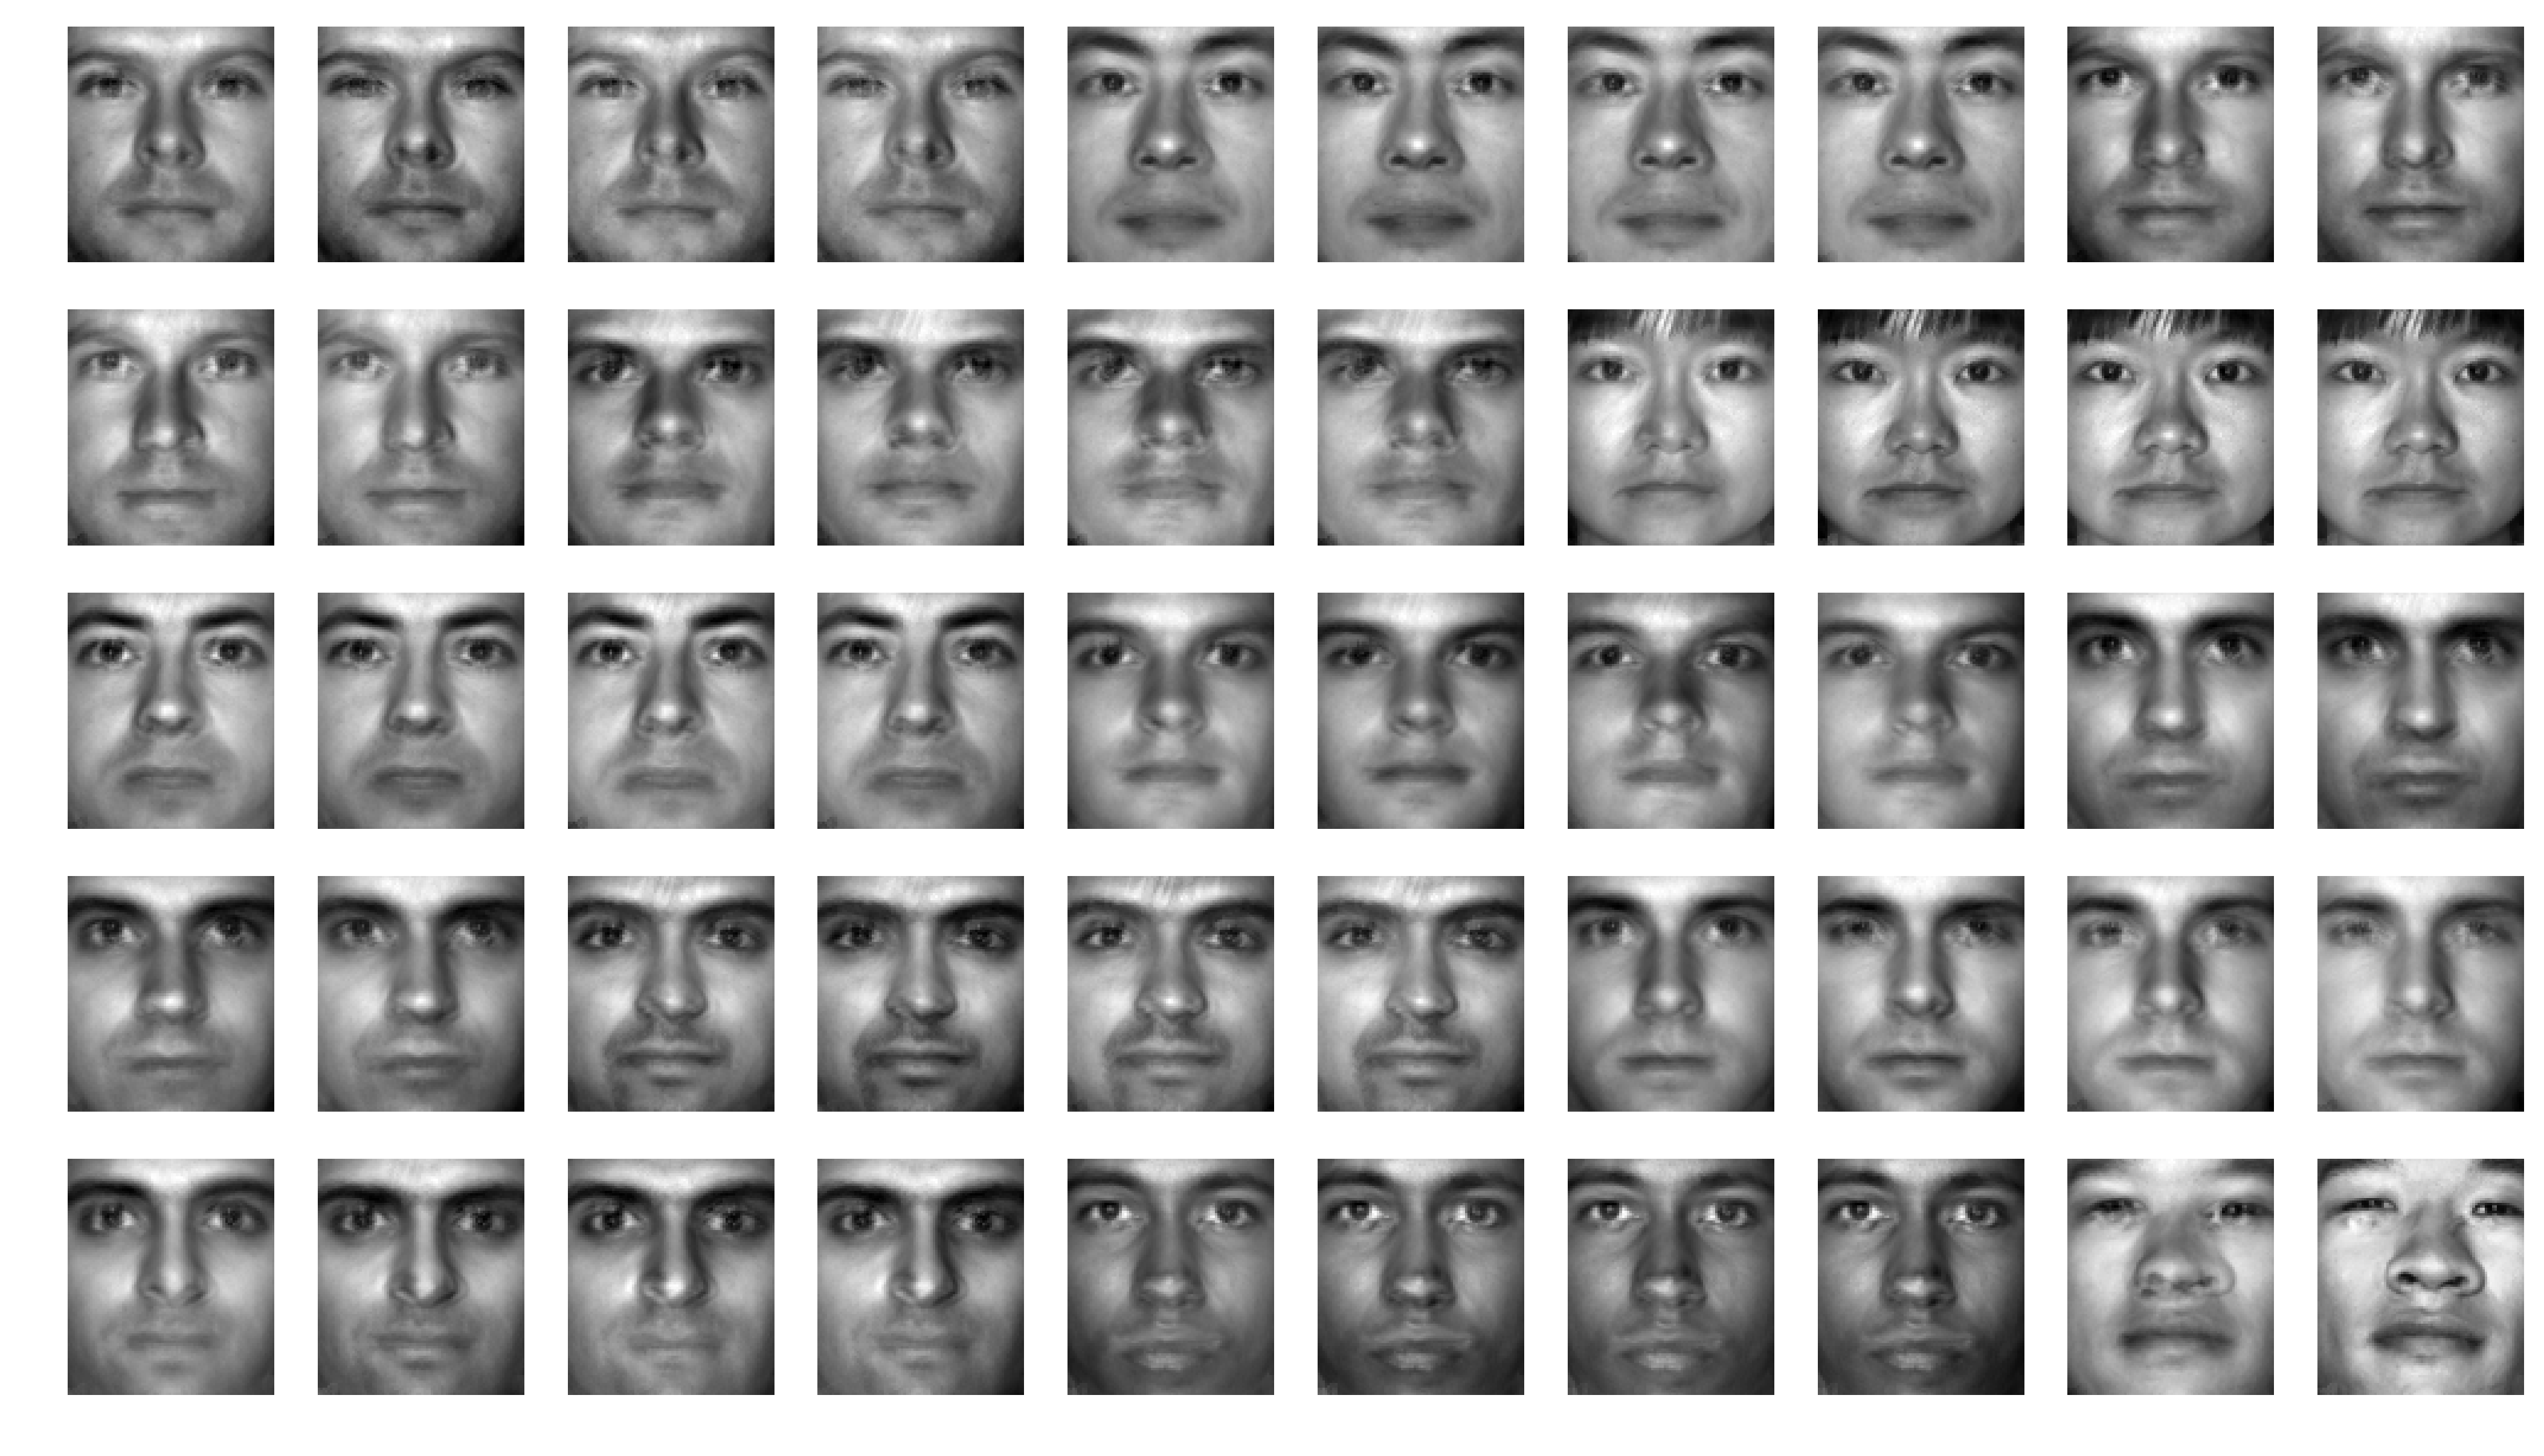

In [34]:
transformed_16 = kltpca(x, n_components=16)
image_grid(transformed_16[:50], image_h, image_w)

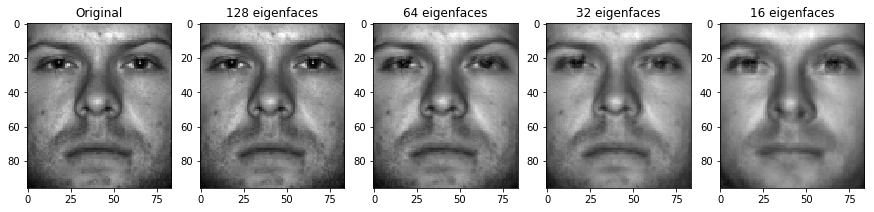

In [35]:
fig, axx = plt.subplots(1,5, figsize=(15,5))

axx[0].imshow(x[0].reshape(image_h, image_w), cmap='gray')
axx[0].set_title('Original')
axx[1].imshow(transformed_128[0].reshape(image_h, image_w), cmap='gray')
axx[1].set_title('128 eigenfaces')
axx[2].imshow(transformed_64[0].reshape(image_h, image_w), cmap='gray')
axx[2].set_title('64 eigenfaces')
axx[3].imshow(transformed_32[0].reshape(image_h, image_w), cmap='gray')
axx[3].set_title('32 eigenfaces')
axx[4].imshow(transformed_16[0].reshape(image_h, image_w), cmap='gray')
axx[4].set_title('16 eigenfaces');

### Additional: Implementing fast-way PCA:

In [36]:
def kltpca_vec(data, n_components=4): 
    #just vectorize
    U, s, V = svds(np.copy(data).T, k=n_components)
    return (data@U)@U.T

In [37]:
transformed_vec_128 = kltpca_vec(x, n_components=128)
transformed_vec_64 = kltpca_vec(x, n_components=64)
transformed_vec_32 = kltpca_vec(x, n_components=32)
transformed_vec_16 = kltpca_vec(x, n_components=16)
transformed_vec_4 = kltpca_vec(x, n_components=4)

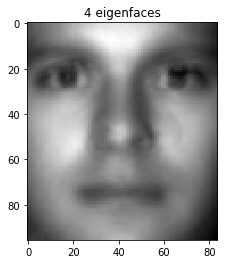

In [38]:
plt.imshow(transformed_vec_4[0].reshape(image_h, image_w), cmap='gray')
plt.title('4 eigenfaces');

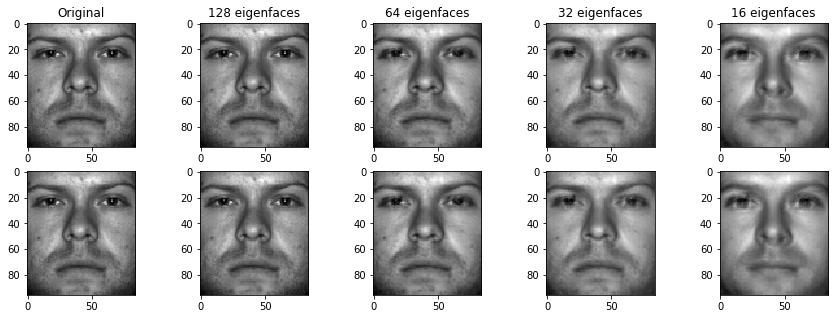

In [39]:
fig, axxs = plt.subplots(2,5, figsize=(15,5))
tr = (x[0], transformed_128[0], transformed_64[0], transformed_32[0], transformed_16[0])
tr_vec = (x[0], transformed_vec_128[0], transformed_vec_64[0], transformed_vec_32[0], transformed_vec_16[0])
titles = ('Original', '128 eigenfaces', '64 eigenfaces', '32 eigenfaces', '16 eigenfaces')
for i in range(2):
    for j in range(5):
        if i:
            axxs[i,j].imshow(tr_vec[j].reshape(image_h, image_w), cmap='gray')
        else:
            axxs[i,j].imshow(tr[j].reshape(image_h, image_w), cmap='gray')
            axxs[i,j].set_title(titles[j])

We can see that results are the same, but vectorized form works much faster.

# Wiener denoising and deconvolution

### Exercise 1

Given an image with white Gaussian noise $\sigma = 0.1$. Implement the **Wiener filter** and denoise the given image.

/home/art_mos/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


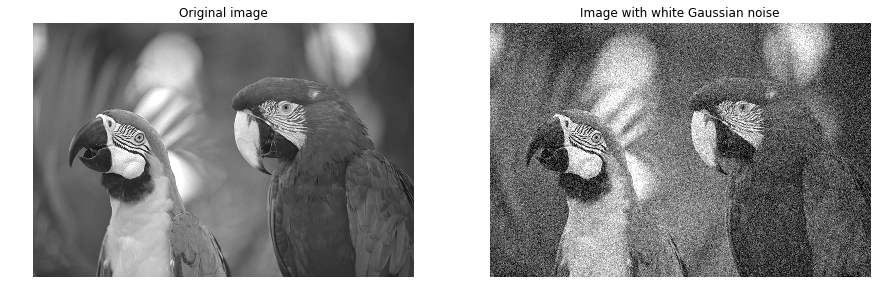

In [40]:
# read images

image_original = scipy.misc.imread('images/macaws_original.png')
image_gaussian = scipy.misc.imread('images/macaws_noised.png')

# show images

show_images(image_original, 'Original image', image_gaussian, 'Image with white Gaussian noise')

In [41]:
from skimage.measure import compare_psnr
from scipy.signal import convolve2d
from skimage import img_as_float

def wiener_denoise(image, sigma):
    
    g = np.copy(img_as_float(image))

    G = np.fft.fft2(g)
    P  =  np.power(np.abs(np.fft.fft2(g)),2) / (g.shape[0]*g.shape[1])
    wiener = np.divide(P,P+np.ones_like(P)*sigma)
    
    denoised = np.fft.ifft2(np.multiply(wiener, G))
    
    return img_as_float(np.real(denoised))

In [42]:
wiener_denoised = wiener_denoise(image_gaussian, 0.01)

/home/art_mos/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


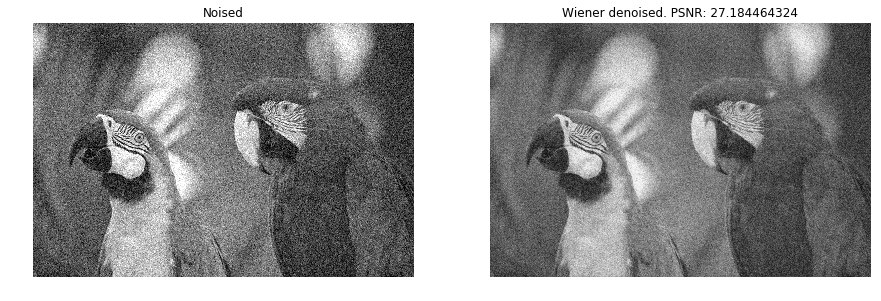

In [43]:
show_images(image_gaussian, 'Noised', wiener_denoised, 'Wiener denoised. PSNR: '+str(compare_psnr(img_as_float(image_gaussian), wiener_denoised)))

### Exercise 2

Given an image $ I(x, y) $ with horizontal motion blur filter $ M(x) $ with lenght $ L = 5 $ and zero-mean Gaussian noise $ G(x, y) $ with $ \sigma = 0.05 $:

$$
I(x, y) = M(x) \ast D(x, y) + G(x, y), 
$$

where

$$
M(x) = \begin{bmatrix} 0.2 & 0.2 & 0.2 & 0.2 & 0.2 \end{bmatrix} .
$$

Deblur the given image using  

a) inverse filter;

b) the **Wiener filter**

and compare the results. In case of the Wiener filter play with $ K $ to get the best one.

/home/art_mos/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


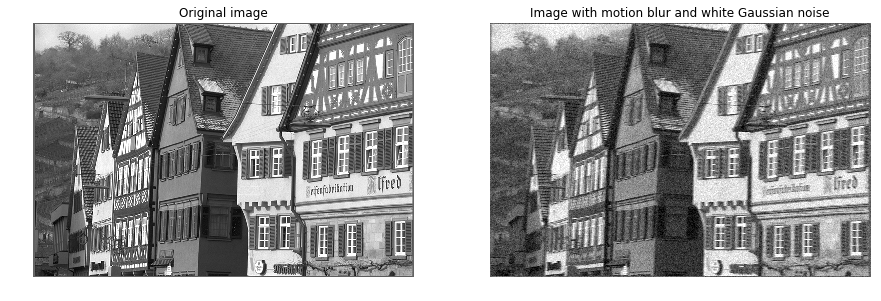

In [44]:
# read images

image_original = scipy.misc.imread('images/houses_original.png')
image_gaussian = scipy.misc.imread('images/houses_blurred_noised.png')

# show images

show_images(image_original, 'Original image', image_gaussian, 'Image with motion blur and white Gaussian noise')

In [45]:
def convolve_2d(image, kernel, mode='same', boundary='symm'):
    image = np.copy(img_as_float(image))
    
    if image.ndim == 2:
        d1 = image.copy()
        convolved = convolve2d(in1=image, in2=kernel, boundary=boundary, mode=mode)
    elif image.ndim == 3:
        d1, d2, d3 = image[:,:,0].copy(), image[:,:,1].copy(), image[:,:,2].copy()
        convolved0 = convolve2d(in1=d1, in2=kernel, boundary=boundary, mode=mode)
        convolved1 = convolve2d(in1=d2, in2=kernel, boundary=boundary, mode=mode)
        convolved2 = convolve2d(in1=d3, in2=kernel, boundary=boundary, mode=mode)
        convolved = np.stack([convolved0,convolved1,convolved2], axis=2)
    return img_as_float(convolved)

In [46]:
motion_kernel = np.array([0.2,0.2,0.2,0.2,0.2]).reshape(1,-1)
motion_kernel

array([[ 0.2,  0.2,  0.2,  0.2,  0.2]])

###### Inverse Filtering:

In [47]:
from skimage.measure import compare_psnr
from scipy.signal import convolve2d
from skimage import img_as_float

def inverse_deblure(g, h):
    
    g = np.copy(img_as_float(g))
    G = np.fft.fft2(g)
    
    ker_pad = ((0,g.shape[0]-1),(0,g.shape[1]-1))
    img_pad = ((int(h.shape[0]//2-1), int(h.shape[0]-h.shape[0]//2)),(int(h.shape[1]//2-1), int(h.shape[1]-h.shape[1]//2)))
    img_pad = list(img_pad)
    
    if sum(img_pad[0]) == 0:
        img_pad[0] = (0,0)
    if sum(img_pad[1]) == 0:
        img_pad[1] = (0,0)
    img_pad = tuple(img_pad)
    
    g = np.pad(g, img_pad, mode='constant')
    h = np.pad(h, ker_pad, mode='constant')
    
    G = np.fft.fft2(g)
    H = np.fft.fft2(h)
    
    inversedb = np.fft.ifft2(np.divide(G, H))[-1*(ker_pad[0][1]+1):, -1*(ker_pad[1][1]+1):]
    
    return img_as_float(np.real(inversedb))

In [48]:
inverse_filteredb=inverse_deblure(image_gaussian, motion_kernel)

/home/art_mos/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


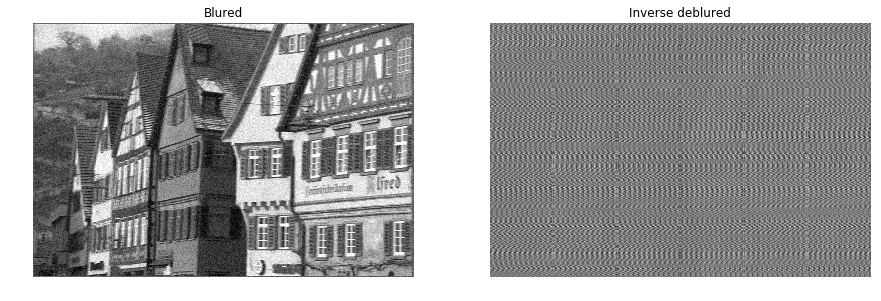

In [49]:
show_images(image_gaussian, 'Blured', inverse_filteredb, 'Inverse deblured')

- The result is bad as heck. I thought that I did something wrong when I first saw this, but when I checked the literature and the google, I found out that such sort of output is pretty common for inverse filtering. Proof: https://www.youtube.com/watch?v=l3LMVLbDCic (9:10).

###### Wiener filter:

In [50]:
def wiener_deblure(g, h, K):
    
    g = np.copy(img_as_float(g))
    G = np.fft.fft2(g)
    
    ker_pad = ((0,g.shape[0]-1),(0,g.shape[1]-1))
    img_pad = ((int(h.shape[0]//2-1), int(h.shape[0]-h.shape[0]//2)),(int(h.shape[1]//2-1), int(h.shape[1]-h.shape[1]//2)))
    img_pad = list(img_pad)
    
    if sum(img_pad[0]) == 0:
        img_pad[0] = (0,0)
    if sum(img_pad[1]) == 0:
        img_pad[1] = (0,0)
    img_pad = tuple(img_pad)
    
    g = np.pad(g, img_pad, mode='constant')
    h = np.pad(h, ker_pad, mode='constant')
    
    G = np.fft.fft2(g)
    H = np.fft.fft2(h)
    H_conj = np.conj(H)
    
    wiener = np.divide(H_conj, np.power(np.abs(H),2)+np.ones_like(H_conj)*K)
    
    wiener_db = np.fft.ifft2(np.multiply(wiener, G))#[-1*(ker_pad[0][1]+1):, -1*(ker_pad[1][1]+1):]
    
    return img_as_float(np.real(wiener_db))

/home/art_mos/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


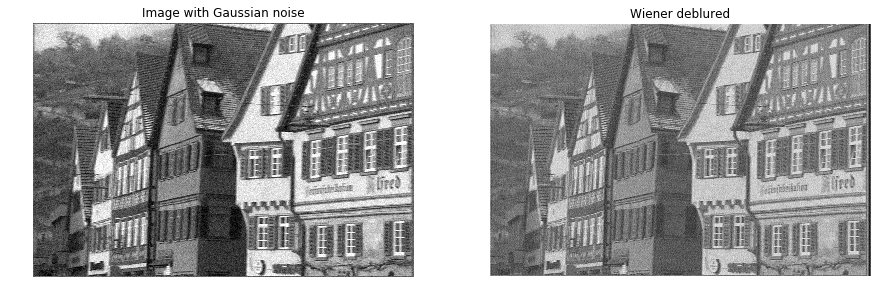

In [51]:
wiener_filtered=wiener_deblure(image_gaussian, motion_kernel, K=0.1)
show_images(image_gaussian, 'Image with Gaussian noise', wiener_filtered, 'Wiener deblured')